In [11]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv("data.csv")
df.head()

,Team,Location,Division,Tier,Image Score,Cyber-Physical Challenge,Net Academy Challenge,Web Based Challenge,Total
0,17-0008,AL,Open,Platinum,119,40.00,112.74,15,286.74
1,17-0010,AL,Open,Gold,58,21.33,37.97,0,117.30
2,17-0014,OK,Open,Platinum,57,16.00,60.35,0,133.35
3,17-0015,IN,Middle School,Middle School,65,0.00,0.00,0,65.00
4,17-0019,NJ,CAP,Platinum,115,80.00,41.29,76,312.29


In [13]:
tiers = df["Tier"]


In [14]:
def convert_to_numerical(data):
    numericaldata = data.drop("Location",axis = 1)
    numericaldata = numericaldata.drop("Division",axis = 1)
    numericaldata = numericaldata.drop("Tier", axis = 1)
    numericaldata = numericaldata.drop("Team",axis = 1)
    return numericaldata



In [15]:
numericaldata = convert_to_numerical(df)


<Axes: >

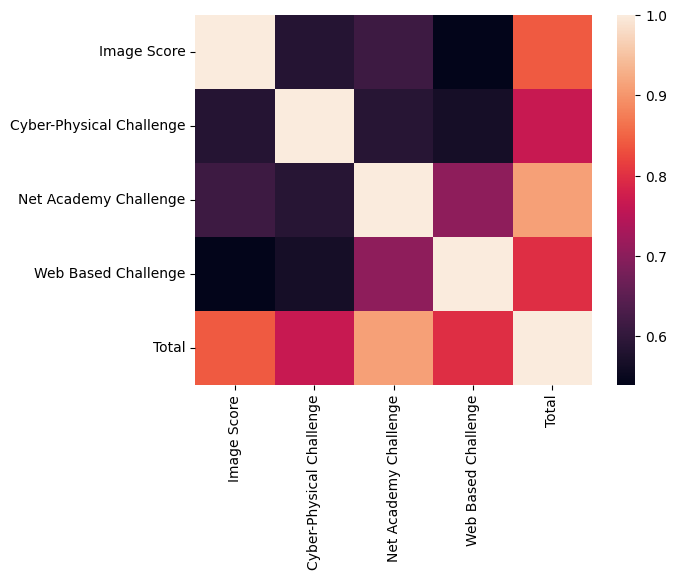

In [16]:
sns.heatmap(numericaldata.corr())

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(numericaldata)
Scaled_data = scaler.transform(numericaldata)

model = PCA(n_components= 2)
model.fit(Scaled_data)

PCS = model.transform(Scaled_data)
PCA_df = pd.DataFrame(PCS,columns = ["PC1","PC2"])
PCA_df["Tier"] = tiers
PCA_df["Tier"] = PCA_df["Tier"].replace("Middle School",0)
PCA_df["Tier"] = PCA_df["Tier"].replace("Silver",1)
PCA_df["Tier"] = PCA_df["Tier"].replace("Gold",2)
PCA_df["Tier"] = PCA_df["Tier"].replace("Platinum",3)
PCA_df.head() 

,PC1,PC2,Tier
0,2.494900,-0.529899,3
1,-0.268308,-0.257334,2
2,-0.111602,0.023528,3
3,-1.181472,-0.152973,0
4,4.016210,0.035092,3


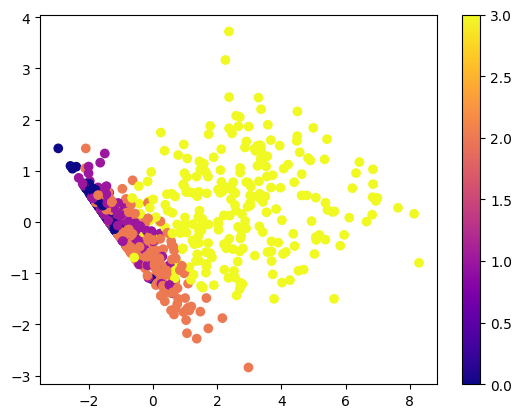

In [18]:
plt.scatter(PCA_df["PC1"],PCA_df["PC2"],c = PCA_df["Tier"],cmap = "plasma")
plt.colorbar()

In [19]:
platinum = df[(df["Tier"] == "Platinum")]
platinum.head()

,Team,Location,Division,Tier,Image Score,Cyber-Physical Challenge,Net Academy Challenge,Web Based Challenge,Total
0,17-0008,AL,Open,Platinum,119,40.0,112.74,15,286.74
2,17-0014,OK,Open,Platinum,57,16.0,60.35,0,133.35
4,17-0019,NJ,CAP,Platinum,115,80.0,41.29,76,312.29
5,17-0021,NJ,CAP,Platinum,110,48.0,131.65,64,353.65
6,17-0024,NJ,CAP,Platinum,59,0.0,63.15,0,122.15


In [ ]:
platinum = convert_to_numerical(platinum)

<Axes: xlabel='PC1', ylabel='PC2'>

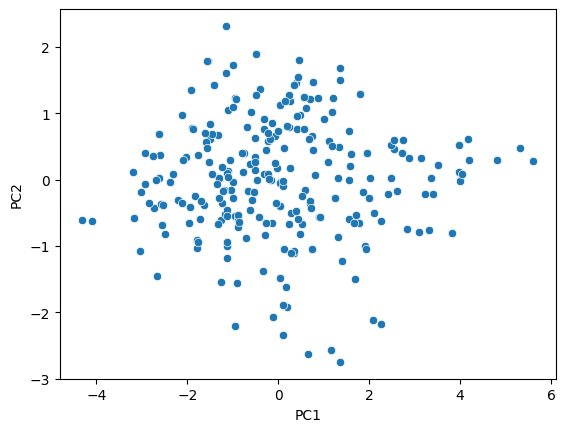

In [32]:
scaler = StandardScaler()
scaler.fit(platinum)
Scaled_data = scaler.transform(platinum)

model = PCA(n_components= 2)
model.fit(Scaled_data)

PCS = model.transform(Scaled_data)
PCA_df = pd.DataFrame(PCS,columns = ["PC1","PC2"])

sns.scatterplot(PCA_df, x = "PC1", y = "PC2", legend = "full" )


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 246 samples in 0.001s...
[t-SNE] Computed neighbors for 246 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 246 / 246
[t-SNE] Mean sigma: 0.923153
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.268692
[t-SNE] KL divergence after 300 iterations: 0.485177


<Axes: xlabel='TSNE1', ylabel='TSNE2'>

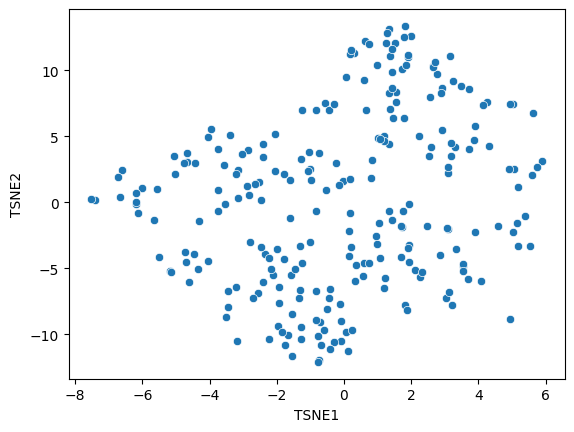

In [43]:
from sklearn.manifold import TSNE


model = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne = model.fit_transform(Scaled_data)
tsne = pd.DataFrame(tsne,columns= ["TSNE1","TSNE2"])

sns.scatterplot(data = tsne,
                x = "TSNE1",
                y = "TSNE2")